In [28]:
import numpy as np
import pandas as pd
from sklearn import datasets # sklearn => 사이키런
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)
redwine["type"] = "red"
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)
whitewine["type"] = "white"
wine = redwine.append(whitewine)    #redwine에 whitewine을 붙여라.(밑으로 붙였네~)

In [11]:
redwine.shape

(1599, 13)

In [5]:
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [6]:
wine.shape   # 전체 set이 wine set이다.

(6497, 13)

In [7]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [44]:
X = wine.drop(["type",'quality'],axis=1)
X.shape

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [48]:
y = wine.quality
print(y.shape)   # wine의 quality 값이 출력이 된다.
print(y)


(6497,)
0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64


In [50]:
regr = LinearRegression()    # LinearRegression :  선형회귀 문제 풀기... -> 직선을 선형알고리즘으로 보면서 푼다는 뜻.

In [51]:
regr.fit(X,y)   # X,y 를 넣어주면 알아서 학습해줌..  => fit 이란 함수는 ' 학습 시켜 주세요!!' 라고 하는 함수

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#예측을 해 봅시다.

r = regr.predict(X) # 내가 학습하고 싶은 데이터의 예측을 봐 볼까요?
print(r[0])    # 첫번째 와인의 등급   ===> 실제 데이터는 5등급이었다!
print(r[1])    # 두번쨰 와인의 등급

4.997607397150453
4.924992756593674


In [53]:
r = regr.predict(X)
print('오차:',np.abs(y-r)) # 오차를 구해보니깐.. 엄청 작네!! 오차가!!! 즉슨, 거의 맞췄다는 이야기.... y = 실제데이터, r =  학습된 예측데이터

오차: 0       0.002393
1       0.075007
2       0.034663
3       0.319667
4       0.002393
          ...   
4893    0.168984
4894    0.608278
4895    0.580639
4896    0.567344
4897    0.205727
Name: quality, Length: 6497, dtype: float64


In [54]:
print('오차평균:',np.mean(np.abs(y-r)))     # 평균적으로 0.56정도만 오차가 난다... 이 오차가 작은 것인지.. 큰것인지..'사장님'은 잘 모른다ㅠㅠ

오차평균: 0.568315902311135


In [55]:
r = regr.predict(X)
print(np.round(r))         # 등급을 반올림 해주는 것!!!

[5. 5. 5. ... 5. 6. 6.]


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4893    0.0
4894    1.0
4895   -1.0
4896   -1.0
4897    0.0
Name: quality, Length: 6497, dtype: float64


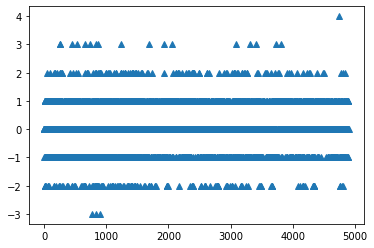

In [35]:
r = regr.predict(X)
result = np.round(r) - y

print(result)    # result가 0 이라는 것은... 정확히 맞췄다는 이야기이다.


#데이터가 얼마나 -3~4까지 분포가 되어있는지 (오류가 어떻게 분포가 되어있는지 평가할 수 있다...)
# 즉, result = np.round(r) - y     이 '0'일때가 '정확히' 맞췄다는 이야기!   # 4에 분포되어있는 것은 실제갑이랑 등급이 4나 차이난다는것.. 완전 못함 ㅡㅡ
plt.plot(result, '^')

In [30]:
np.round(r) - y == 0    # 결과(오차)가 0 이니? 하고 묻는 함수다.

0        True
1        True
2        True
3        True
4        True
        ...  
4893     True
4894    False
4895    False
4896    False
4897     True
Name: quality, Length: 6497, dtype: bool

In [32]:
np.sum(np.round(r) - y == 0) 
# 0이 3465개 있네!!! 즉, 전체 데이터 중에서 3465개는 정확히 맞추었다는 것이다
# => 전체가 6천몇개인데 잘 맞춘 것은 아니라고 볼 수 있다.. => 근데 너무 야박하지 않니..?

3465

In [34]:
# 야박하니깐, 1정도의 등급차이는 봐주자!!!  1등급 정도의 오차는 괜찮다!!! 라고 이야기해야지~~~ ㅋㅋㅋㅋㅋ 사장님한테..
np.sum(np.abs(np.round(r)-y)<=1)    # 6169개의 맞았네^^ 쓸만하네~ 라고 생각할 수도 있다. => 이렇게 보고해봐!

6169

In [36]:
y.size    # y의 데이터 갯수...

6497

In [37]:
np.sum(np.abs(np.round(r)-y)<=1)  /y.size          # 따라서, 품질을 맞출 확률은 약 95%정도 입니다. 라고 할 수 있다.

0.9495151608434662

In [43]:
print(regr.coef_)  


#fixed acidity
#volatile acidity
#citric acid
#residual sugar
#chlorides
#free sulfur dioxide
#total sulfur dioxide
#density
#pH
#sulphates
#alcohol
#quality
#type

[ 6.76839156e-02 -1.32789221e+00 -1.09656648e-01  4.35587507e-02
 -4.83713531e-01  5.96988830e-03 -2.48129841e-03 -5.49669422e+01
  4.39296072e-01  7.68251760e-01  2.67030009e-01]


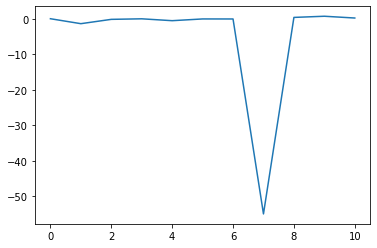

In [40]:
plt.plot(regr.coef_)      # 그래프 의미 : w를 다 출력해보았더니 나오는 것... / 
#7번째가 반비례 관계(음의 관계)가 있어서 '퀄리티'에 심각한 영향을 준다는 의미하므로, 관리를 잘 해주어야 한다는 의미다.
#7번쨰 (실지적으로 8번째 컬럼) => PH dlsep... pH가 높으면!!! 안좋다는 의미... pH는 무조건 낮아야 한다는 의미

In [42]:
x = np.array([7.4,0.5,0.2,0.3,0.2,0.4,0.2,3,-0.4,1.0,0.7])
print(x.shape)
print(regr.predict([x])) # 등급이 -108등급 나왔네ㅋㅋㅋㅋㅋ;;; 말도안되는 등그.ㅂ.

(11,)
[-108.62542255]


In [61]:
x = np.array([7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4])



print(regr.predict([x]))

[4.9976074]
